In [112]:
# Lo primero que hago para poder trabajar con los datos es importar las librerias necesarias:

# Para tratamiento de datos:
# ----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt


# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
# ------------------------------------------------------------------------------
import scipy.stats as stats
from scipy.stats import chi2_contingency, ttest_ind, shapiro, poisson, chisquare, expon, kstest



# configuro pandas para que me muestre todas las columnas del dataframe

pd.set_option('display.max_columns', None)



In [113]:
# Abro los csv y los guardo en dos dataframes, uno llamado customer_info 
# (porque contiene informacion detallada del cliente), y otro llamado customer_flights 
# (contiene informacion de los vuelos realizados por el cliente)

customer_info = pd.read_csv("files/Customer Loyalty History.csv")
customer_flights = pd.read_csv("files/Customer Flight Activity.csv")

## FASE 1.1: Exploracion Datos

### - Vamos a ver primero lo que tenemos en customer_info

In [114]:
# numero columnas y filas, lo hago con el metodo shape, que contiene una tupla cuyo primer elemento (index 0) es el 
# numero de filas y su segundo elemento (index 1) es el numero de columnas. 

print(f""" 
El numero de filas que tenemos en customer_info son {customer_info.shape[0]} y el numero de columnas 
que tenemos son {customer_info.shape[1]} 
-------------------------------------------------------------------------------------------------------""")

# Miramos primeros 4 elementos 

print(f"Vamos a ver una pequeña muestra de su contenido:\n\n4 PRIMERAS FILAS\n-----------------------------------------------------------------------") # metodo head()

customer_info.head(4)


 
El numero de filas que tenemos en customer_info son 16737 y el numero de columnas 
que tenemos son 16 
-------------------------------------------------------------------------------------------------------
Vamos a ver una pequeña muestra de su contenido:

4 PRIMERAS FILAS
-----------------------------------------------------------------------


,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN


In [115]:
print("4 ULTIMAS FILAS\n-----------------------------------------------------------------------")
customer_info.tail(5)

4 ULTIMAS FILAS
-----------------------------------------------------------------------


,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
16732,823768,Canada,British Columbia,Vancouver,V6E 3Z3,Female,College,NaN,Married,Star,61850.19,Standard,2012,12,NaN,NaN
16733,680886,Canada,Saskatchewan,Regina,S1J 3C5,Female,Bachelor,89210.0,Married,Star,67907.27,Standard,2014,9,NaN,NaN
16734,776187,Canada,British Columbia,Vancouver,V5R 1W3,Male,College,NaN,Single,Star,74228.52,Standard,2014,3,NaN,NaN
16735,906428,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,-57297.0,Married,Star,10018.66,2018 Promotion,2018,4,NaN,NaN
16736,652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2015,12,2016.0,8.0


In [116]:
print("4 FILAS ALEATORIAS\n-----------------------------------------------------------------------")

customer_info.sample(5)

4 FILAS ALEATORIAS
-----------------------------------------------------------------------


,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
8397,207492,Canada,Ontario,Thunder Bay,K8T 5M5,Female,Doctor,149992.0,Married,Nova,8936.37,Standard,2012,5,NaN,NaN
14376,815718,Canada,Ontario,Toronto,P1W 1K4,Female,College,NaN,Married,Star,6940.07,Standard,2012,8,NaN,NaN
16678,552776,Canada,Manitoba,Winnipeg,R6Y 4T5,Female,Bachelor,46607.0,Married,Star,34611.38,Standard,2016,6,2017.0,2.0
8918,674805,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,Bachelor,95423.0,Married,Nova,11820.11,Standard,2014,6,NaN,NaN
9090,304870,Canada,Ontario,Toronto,M8Y 4K8,Male,Bachelor,57148.0,Married,Nova,13355.49,Standard,2018,6,NaN,NaN


In [117]:
# mirando tail, head y sample puedo sacar algunas conclusiones:

print(f"""
1) Parece que Loyalty Number es un identificador unico para cada cliente, teniendo en cuenta el numero de filas
   totales y que el metodo unique devuelve un array con todos los elementos únicos, si 
   la longitud del array coincide con el numero de filas sabemos que todos los registros son unicos 
   (no hay dos iguales en todo el dataframe). 
   ¿COINCIDE EL NUMERO DE REGISTROS UNICOS CON EL TOTAL DE FILAS? ==> {len(customer_info['Loyalty Number'].unique()) == customer_info.shape[0]}
   Podemos concluir que Loyalty Number es el identificador único para el cliente. 
   Otra forma de ver si hay registros duplicados solo en la columna ['Loyalty Number'] seria usando como parámetro subset='Loyalty Number'
   DUPLICADOS LOYALTY NUMBER ==> {customer_info.duplicated(subset='Loyalty Number').sum()}
2) aparentemente el país es Canadá en todos los registros de 'Country'
3) Cancellation Year y Cancellation Month tienen muchos NaN, probablemente sean de clientes que no han cancelado, 
   en este caso los nulos sí aportan información valiosa.
4) En Salary hay muchos valores NaN, seguramente porque no dispongamos de datos, suficientes, tendremos que 
   gestionarlo. 
""")


1) Parece que Loyalty Number es un identificador unico para cada cliente, teniendo en cuenta el numero de filas
   totales y que el metodo unique devuelve un array con todos los elementos únicos, si 
   la longitud del array coincide con el numero de filas sabemos que todos los registros son unicos 
   (no hay dos iguales en todo el dataframe). 
   ¿COINCIDE EL NUMERO DE REGISTROS UNICOS CON EL TOTAL DE FILAS? ==> True
   Podemos concluir que Loyalty Number es el identificador único para el cliente. 
   Otra forma de ver si hay registros duplicados solo en la columna ['Loyalty Number'] seria usando como parámetro subset='Loyalty Number'
   DUPLICADOS LOYALTY NUMBER ==> 0
2) aparentemente el país es Canadá en todos los registros de 'Country'
3) Cancellation Year y Cancellation Month tienen muchos NaN, probablemente sean de clientes que no han cancelado, 
   en este caso los nulos sí aportan información valiosa.
4) En Salary hay muchos valores NaN, seguramente porque no dispongamos de d

In [118]:
# Vamos a investigar un poco más los nulos de Salary

display(customer_info[customer_info['Salary'].isna() == True].sample(5))
# mirando el dataframe filtrado parece que todas las columnas Educacion son College, vamos a ver si alguna otra categoria tiene NaN

print(f"""
Las categorias de Educación que no tienen datos en Salary son ==>
{customer_info[customer_info['Salary'].isna() == True]['Education'].value_counts()}, este numero coincide con el numero de 
nulos
NULOS TOTALES EN SALARY {customer_info['Salary'].isnull().sum()}
Por lo tanto no se ha hecho una buena recolección de datos, y todos los clientes que tienen categoria College en 
Educación no tenemos datos disponibles de Salary""")

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
399,324707,Canada,Quebec,Montreal,H2Y 2W2,Male,College,NaN,Married,Star,4572.04,Standard,2013,3,NaN,NaN
8094,698988,Canada,New Brunswick,Moncton,E1A 2A7,Female,College,NaN,Single,Nova,8336.08,Standard,2012,4,NaN,NaN
10037,693045,Canada,Quebec,Montreal,H2Y 2W2,Female,College,NaN,Single,Star,2258.79,Standard,2017,12,NaN,NaN
16460,802621,Canada,Ontario,Kingston,M9K 2P4,Male,College,NaN,Single,Star,22448.69,Standard,2014,1,NaN,NaN
12113,966227,Canada,Alberta,Edmonton,T9G 1W3,Male,College,NaN,Married,Star,3123.08,Standard,2018,5,NaN,NaN



Las categorias de Educación que no tienen datos en Salary son ==>
Education
College    4238
Name: count, dtype: int64, este numero coincide con el numero de 
nulos
NULOS TOTALES EN SALARY 4238
Por lo tanto no se ha hecho una buena recolección de datos, y todos los clientes que tienen categoria College en 
Educación no tenemos datos disponibles de Salary


In [119]:
# Nombre y datos de columnas: metodo columns y info()

print(f"""
Para ver unicamente el nombre de las columnas puedo usar customer_info.columns ==> \n{customer_info.columns}
\n----------------------------------------------------------------------------------------------
Otra opcion es usar customer_info.info(), que además de los nombres da informacion extra:\n   
*** Tipo datos de cada columna \n   
***Elementos NO nulos en cada columna")
-----------------------------------------------------------------------------------------------
Con metodo info ==> \n""")
customer_info.info()



Para ver unicamente el nombre de las columnas puedo usar customer_info.columns ==> 
Index(['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code',
       'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card',
       'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month',
       'Cancellation Year', 'Cancellation Month'],
      dtype='object')

----------------------------------------------------------------------------------------------
Otra opcion es usar customer_info.info(), que además de los nombres da informacion extra:
   
*** Tipo datos de cada columna 
   
***Elementos NO nulos en cada columna")
-----------------------------------------------------------------------------------------------
Con metodo info ==> 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non

In [120]:
print("""
Conclusiones tras ver los que me muestra el metodo info()
- Solo hay 3 columnas con valores nulos, que son ==> Salary, Cancellation Year y Cancellation Month
- Hay incongruencia con el tipo de datos de "Enrollment Year", "Enrollment Month", "Cancellation Year" y "Cancellation Month"
  Pues siendo mismo tipo de informacion (año y mes), en unos figura como float y en otros como int, habría que homogeneizarlos
  o convertirlos todos a Datetype. 
'""")


Conclusiones tras ver los que me muestra el metodo info()
- Solo hay 3 columnas con valores nulos, que son ==> Salary, Cancellation Year y Cancellation Month
- Hay incongruencia con el tipo de datos de "Enrollment Year", "Enrollment Month", "Cancellation Year" y "Cancellation Month"
  Pues siendo mismo tipo de informacion (año y mes), en unos figura como float y en otros como int, habría que homogeneizarlos
  o convertirlos todos a Datetype. 
'


In [121]:
# calculamos el total de nulos de cada columna en porcentaje, pues lo que más nos importa es la proporcion
porcentaje_nulos = customer_info.isnull().sum()/customer_info.shape[0] *100
# para ello dividimos la suma de todos los nulos de cada columna por el numero total de filas y multiplicamos por 100

# Hacemos un dataframe y filtramos solo las columnas que tienen nulos para una mejor visualizacion
nulos_customer_info = pd.DataFrame(porcentaje_nulos, columns=['% Nulos'])

print("El porcentaje de Nulos que tenemos en el dataframa customer_info es ==> ")
nulos_customer_info[nulos_customer_info['% Nulos'] > 0]


El porcentaje de Nulos que tenemos en el dataframa customer_info es ==> 


,% Nulos
Salary,25.321145
Cancellation Year,87.650117
Cancellation Month,87.650117


In [122]:
print('''
Conclusion respecto al análisis de nulos: \n
  - Proporción muy alta de nulos en columnas Cancellation Year y Cancellation Month, bajo mi punto de vista
    estos nulos aportan información. Se corresponden con clientes que no se han dado de baja.
  - En cambio, en la columna Salary nos falta informacion para un 25% de los registros, siendo un dato 
    importante, pues nos da informacion de la solvencia económica de nuestros clientes. 

* De cara a que afecte lo mínimo a estudios estadísticos que se puedan hacer con estos datos, una buena opción
  sería imputar estos nulos por la media o la mediana (dependiendo del grado de dispersion de los datos, lo cual
  veremos más adelante.)
''')


Conclusion respecto al análisis de nulos: 

  - Proporción muy alta de nulos en columnas Cancellation Year y Cancellation Month, bajo mi punto de vista
    estos nulos aportan información. Se corresponden con clientes que no se han dado de baja.
  - En cambio, en la columna Salary nos falta informacion para un 25% de los registros, siendo un dato 
    importante, pues nos da informacion de la solvencia económica de nuestros clientes. 

* De cara a que afecte lo mínimo a estudios estadísticos que se puedan hacer con estos datos, una buena opción
  sería imputar estos nulos por la media o la mediana (dependiendo del grado de dispersion de los datos, lo cual
  veremos más adelante.)



In [123]:
# Comprobamos si tenemos algún registro duplicado
print(f"El número de registros duplicados que tenemos en customer_info es {customer_info.duplicated().sum()} duplicados")
# No hay registros duplicados

El número de registros duplicados que tenemos en customer_info es 0 duplicados


In [124]:
# Ahora voy a explorar ciertos parámetros estadísticos.

customer_info.describe()
# por defecto nos devuelve estadisticos de variables numéricas

,Loyalty Number,Salary,CLV,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
count,16737.000000,12499.000000,16737.000000,16737.000000,16737.000000,2067.000000,2067.000000
mean,549735.880445,79245.609409,7988.896536,2015.253211,6.669116,2016.503145,6.962748
std,258912.132453,35008.297285,6860.982280,1.979111,3.398958,1.380743,3.455297
min,100018.000000,-58486.000000,1898.010000,2012.000000,1.000000,2013.000000,1.000000
25%,326603.000000,59246.500000,3980.840000,2014.000000,4.000000,2016.000000,4.000000
50%,550434.000000,73455.000000,5780.180000,2015.000000,7.000000,2017.000000,7.000000
75%,772019.000000,88517.500000,8940.580000,2017.000000,10.000000,2018.000000,10.000000
max,999986.000000,407228.000000,83325.380000,2018.000000,12.000000,2018.000000,12.000000


In [125]:
print(f""" Conclusiones que puedo sacar de describe:\n
1) Hay un salario que despunta hacia abajo, el minimo es -58486, voy a mirar si hay más salarios negativos 
NUMERO SALARIOS NEGATIVOS ==> {customer_info['Salary'][customer_info['Salary'] < 0].count()}
Tenemos un total de 20 salarios negativos, entiendo que es gente que ha generado debitos a la compañía. 

2) La diferencia entre el salario minimo y el salario maximo es muy elevada.
DIFERENCIA ENTRE SALARIO MÁXIMO Y MINIMO ==> {customer_info['Salary'].max() - customer_info['Salary'].min()}

3) Aunque la diferencia entre la media y la mediana de los salarios es pequeña, la dispersion de los datos es
alta (existencia de muchos valores muy separados de la media
Media, Mediana y Desviación Típica 'Salary' ==>
{customer_info['Salary'].agg(['mean', 'median', 'std'])}

4) La columna CLV (Valor aportado por el cliente a la empresa) tiene una dispersión muy alta de los datos, y la diferencia entre el valor máximo y mínimo es 
también muy elevada. La media y la mediana son significativamente diferentes

Media, Mediana y Desviación Típica 'CLV' ==>\n{customer_info['CLV'].agg(['mean', 'median','std'])}")

-----------------------------------------------------------------------------------------------------------------

CONCLUSION ==> Tenemos clientes con valores atipicos, tanto si miramos el salario, como si miramos el 
valor que aportan a la compañia. Si tenemos que usar alguna parámetro estadistico de centralización de datos es preferible usar la 
mediana, por la alta dispersion, tanto en 'Salary' como en 'CLV'
""")


 Conclusiones que puedo sacar de describe:

1) Hay un salario que despunta hacia abajo, el minimo es -58486, voy a mirar si hay más salarios negativos 
NUMERO SALARIOS NEGATIVOS ==> 20
Tenemos un total de 20 salarios negativos, entiendo que es gente que ha generado debitos a la compañía. 

2) La diferencia entre el salario minimo y el salario maximo es muy elevada.
DIFERENCIA ENTRE SALARIO MÁXIMO Y MINIMO ==> 465714.0

3) Aunque la diferencia entre la media y la mediana de los salarios es pequeña, la dispersion de los datos es
alta (existencia de muchos valores muy separados de la media
Media, Mediana y Desviación Típica 'Salary' ==>
mean      79245.609409
median    73455.000000
std       35008.297285
Name: Salary, dtype: float64

4) La columna CLV (Valor aportado por el cliente a la empresa) tiene una dispersión muy alta de los datos, y la diferencia entre el valor máximo y mínimo es 
también muy elevada. La media y la mediana son significativamente diferentes

Media, Mediana y Desvia

In [126]:
# Para usar describe sobre variables categóricas usamos include=object
customer_info.describe(include=object).T

,count,unique,top,freq
Country,16737,1,Canada,16737
Province,16737,11,Ontario,5404
City,16737,29,Toronto,3351
Postal Code,16737,55,V6E 3D9,911
Gender,16737,2,Female,8410
Education,16737,5,Bachelor,10475
Marital Status,16737,3,Married,9735
Loyalty Card,16737,3,Star,7637
Enrollment Type,16737,2,Standard,15766


In [127]:
print(f""" 
Conclusiones de aplicar el metodo describe sobre variables de tipo categórico:
    1) El único país del Dataframe es Canadá, por lo que tendremos que valorar si es una columna que aporte valor 
       o la eliminamos
    2) Tenemos clientes de 11 provincias, donde predomina Ontario
    3) La mayoría de los clientes tienen estudio Bachelor
    4) No hay una diferencia significativa entre hombres y mujeres, predominan discretamente las mujeres pero 
       no es una diferencia significativa
    5) Predominan los clientes Casados, que son más de la mitad del total. 


""")


 
Conclusiones de aplicar el metodo describe sobre variables de tipo categórico:
    1) El único país del Dataframe es Canadá, por lo que tendremos que valorar si es una columna que aporte valor 
       o la eliminamos
    2) Tenemos clientes de 11 provincias, donde predomina Ontario
    3) La mayoría de los clientes tienen estudio Bachelor
    4) No hay una diferencia significativa entre hombres y mujeres, predominan discretamente las mujeres pero 
       no es una diferencia significativa
    5) Predominan los clientes Casados, que son más de la mitad del total. 





In [128]:
print(f"""
Si miramos las diferentes opciones de país que hay en el dataframe vemos que solo aparece Canadá
PAíSES DISTINTOS EN EL DATAFRAME ==> \n{customer_info['Country'].unique()}
""")


Si miramos las diferentes opciones de país que hay en el dataframe vemos que solo aparece Canadá
PAíSES DISTINTOS EN EL DATAFRAME ==> 
['Canada']



In [129]:
customer_info['Province'].value_counts().reset_index()
# la mayoria de los clientes provienen de Ontario, British Columbia y Quebec. 

,Province,count
0,Ontario,5404
1,British Columbia,4409
2,Quebec,3300
3,Alberta,969
4,Manitoba,658
5,New Brunswick,636
6,Nova Scotia,518
7,Saskatchewan,409
8,Newfoundland,258
9,Yukon,110


In [130]:
customer_info['Education'].value_counts().reset_index()
# distribución del nivel educativo de los clientes. 

,Education,count
0,Bachelor,10475
1,College,4238
2,High School or Below,782
3,Doctor,734
4,Master,508


In [131]:
customer_info['Marital Status'].value_counts().reset_index()
# distribución de los clientes según su estado civil. 

,Marital Status,count
0,Married,9735
1,Single,4484
2,Divorced,2518


### - AHORA EXPLORO LOS DATOS DE customer_flights

In [132]:
# Metodo shape (ver dimensiones filas y columnas dataframe)
 
print(f""" 
El numero de filas que tenemos en customer_flights son {customer_flights.shape[0]} y el numero de columnas 
que tenemos son {customer_flights.shape[1]} 
-------------------------------------------------------------------------------------------------------""")

# Miramos primeros 4 elementos 

print(f"Vamos a ver una pequeña muestra de su contenido:\n\n4 PRIMERAS FILAS\n-----------------------------------------------------------------------") # metodo head()

customer_flights.head(4)


 
El numero de filas que tenemos en customer_flights son 405624 y el numero de columnas 
que tenemos son 10 
-------------------------------------------------------------------------------------------------------
Vamos a ver una pequeña muestra de su contenido:

4 PRIMERAS FILAS
-----------------------------------------------------------------------


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0


In [133]:
print(f"4 ULTIMAS FILAS\n-----------------------------------------------------------------------") # metodo head()

customer_flights.tail(4)

4 ULTIMAS FILAS
-----------------------------------------------------------------------


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
405620,999911,2018,12,0,0,0,0,0.0,0,0
405621,999940,2018,12,3,0,3,1233,123.0,0,0
405622,999982,2018,12,0,0,0,0,0.0,0,0
405623,999986,2018,12,0,0,0,0,0.0,0,0


In [134]:
print("4 FILAS ALEATORIAS\n-----------------------------------------------------------------------")

customer_flights.sample(4)

4 FILAS ALEATORIAS
-----------------------------------------------------------------------


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
161302,466477,2017,3,4,0,4,472,47.00,0,0
275638,379351,2018,5,7,0,7,2205,220.00,0,0
228212,818870,2018,4,13,3,16,1664,179.28,0,0
325584,339371,2018,8,9,0,9,2664,266.00,0,0


In [135]:
# informacion general usando metodo info()

customer_flights.info()

print(f""" 
-----------------------------------------------------------------------------------------------
Todos los elementos de este dataframe son de tipo numérico, y no hay ninguna columna con registros 
nulos, puesto el recuento de no nulos es igual que el numero total de entradas. 

Comprobamos que la suma de nulos es 0 ==> \n{customer_flights.isnull().sum()}""")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB


 
-----------------------------------------------------------------------------------------------
Todos los elementos de este dataframe son de tipo numérico, y no hay ninguna columna con registros 
nulos, puesto el recuento de no nulos es igual que el numero total de entradas. 

Comprobamos que la suma de nulos es 0 ==> 
Loyalty Number                 0
Year                           0
Month                          0
Flights Booked                 0
Flights with Companions        0
Total Flights                  0
Distance                       0
Points Accumulated             0
Points Redeemed                0
Dollar Cost Points Redeemed    0
dtype: int64


In [136]:
# valores duplicados con metodo duplicated()

print(f"""
Existen un total de {customer_flights.duplicated().sum()} 
valores duplicados
para ver las columnas que están duplicadas podemos filtrarlas
* En la fase de limpieza tendremos que eliminarlos, pues no tiene sentido tener filas repetidas.
""")

customer_flights[customer_flights.duplicated() == True]


Existen un total de 1864 
valores duplicados
para ver las columnas que están duplicadas podemos filtrarlas
* En la fase de limpieza tendremos que eliminarlos, pues no tiene sentido tener filas repetidas.



,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
42,101902,2017,1,0,0,0,0,0.0,0,0
227,112142,2017,1,0,0,0,0,0.0,0,0
478,126100,2017,1,0,0,0,0,0.0,0,0
567,130331,2017,1,0,0,0,0,0.0,0,0
660,135421,2017,1,0,0,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...
404668,949628,2018,12,0,0,0,0,0.0,0,0
404884,960050,2018,12,0,0,0,0,0.0,0,0
405111,971370,2018,12,0,0,0,0,0.0,0,0
405410,988392,2018,12,0,0,0,0,0.0,0,0


In [137]:
# Analizar parámetros estadisticos con describe()

customer_flights.describe()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
count,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000
mean,550037.873084,2017.500000,6.500000,4.115052,1.031805,5.146858,1208.880059,123.692721,30.696872,2.484503
std,258935.286969,0.500001,3.452057,5.225518,2.076869,6.521227,1433.155320,146.599831,125.486049,10.150038
min,100018.000000,2017.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,326961.000000,2017.000000,3.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,550834.000000,2017.500000,6.500000,1.000000,0.000000,1.000000,488.000000,50.000000,0.000000,0.000000
75%,772194.000000,2018.000000,9.250000,8.000000,1.000000,10.000000,2336.000000,239.000000,0.000000,0.000000
max,999986.000000,2018.000000,12.000000,21.000000,11.000000,32.000000,6293.000000,676.500000,876.000000,71.000000


In [138]:
print(f"""
Conclusiones que podemos sacar con el uso de describe:
------------------------------------------------------------------
Las columnas ==> \n{customer_flights.columns[3:]} tienen mucha dispersion de los datos, por lo que es de esperar 
que nos encontremos con valores atípicos.
Como hay diferencias significativas entre media y mediana si hubiera que usar alguna medida de centralizacion 
sería preferible el uso de la mediana""")


Conclusiones que podemos sacar con el uso de describe:
------------------------------------------------------------------
Las columnas ==> 
Index(['Flights Booked', 'Flights with Companions', 'Total Flights',
       'Distance', 'Points Accumulated', 'Points Redeemed',
       'Dollar Cost Points Redeemed'],
      dtype='object') tienen mucha dispersion de los datos, por lo que es de esperar 
que nos encontremos con valores atípicos.
Como hay diferencias significativas entre media y mediana si hubiera que usar alguna medida de centralizacion 
sería preferible el uso de la mediana


##### UNIMOS LOS DOS DATAFRAMES

In [139]:
# Como tienen datos complementarios, y una columna común, podemos usar el metodo merge, realizando un inner join 
# con la columna común como nexo.
# el metodo merge si no especificamos nada por defecto usa un inner join, podríamos añadir how='inner' pero no hace falta
customer_final = customer_info.merge(customer_flights, on='Loyalty Number')


In [140]:
# numero columnas y filas:

print(f""" 
El numero de filas que tenemos en customer_info son {customer_final.shape[0]} y el numero de columnas 
que tenemos son {customer_final.shape[1]} 
-------------------------------------------------------------------------------------------------------""")

# Miramos primeros 4 elementos 

print(f"Vamos a ver una pequeña muestra de su contenido:\n\n4 PRIMERAS FILAS\n-----------------------------------------------------------------------") # metodo head()

customer_final.head(4)

 
El numero de filas que tenemos en customer_info son 405624 y el numero de columnas 
que tenemos son 25 
-------------------------------------------------------------------------------------------------------
Vamos a ver una pequeña muestra de su contenido:

4 PRIMERAS FILAS
-----------------------------------------------------------------------


,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,1,0,0,0,0,0.0,0,0
1,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,2,3,0,3,2823,282.0,0,0
2,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,3,0,0,0,0,0.0,0,0
3,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,4,0,0,0,0,0.0,0,0


In [141]:
print("""
Las 4 primeras columnas parecen muy similares, pero si nos fijamos son registros del numero de vuelos 
reservados y la distancia recorrida según el mes que estemos analizando. 
En esta tabla se repiten los Loyalty number porque aunque cada Loyalty Number está asociado con un cliente
aqui se está registrando la actividad de compras de este cliente (en este caso vuelos)
""")


Las 4 primeras columnas parecen muy similares, pero si nos fijamos son registros del numero de vuelos 
reservados y la distancia recorrida según el mes que estemos analizando. 
En esta tabla se repiten los Loyalty number porque aunque cada Loyalty Number está asociado con un cliente
aqui se está registrando la actividad de compras de este cliente (en este caso vuelos)



In [142]:
# para ver las columnas que están duplicadas podemos filtrarlas
customer_final[customer_final.duplicated() == True]

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
121,193662,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,51124.0,Married,Star,3844.57,Standard,2012,5,NaN,NaN,2017,1,0,0,0,0,0.0,0,0
160,193662,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,51124.0,Married,Star,3844.57,Standard,2012,5,NaN,NaN,2018,8,0,0,0,0,0.0,0,0
165,193662,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,51124.0,Married,Star,3844.57,Standard,2012,5,NaN,NaN,2018,11,0,0,0,0,0.0,0,0
2977,746226,Canada,British Columbia,Whistler,V6T 1Y8,Female,Bachelor,63501.0,Married,Star,4089.04,Standard,2018,1,NaN,NaN,2017,1,0,0,0,0,0.0,0,0
2979,746226,Canada,British Columbia,Whistler,V6T 1Y8,Female,Bachelor,63501.0,Married,Star,4089.04,Standard,2018,1,NaN,NaN,2017,2,0,0,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381799,373638,Canada,Ontario,Thunder Bay,K8T 5M5,Female,Bachelor,92501.0,Divorced,Star,11073.11,Standard,2014,10,NaN,NaN,2018,4,0,0,0,0,0.0,0,0
381801,373638,Canada,Ontario,Thunder Bay,K8T 5M5,Female,Bachelor,92501.0,Divorced,Star,11073.11,Standard,2014,10,NaN,NaN,2018,5,0,0,0,0,0.0,0,0
381803,373638,Canada,Ontario,Thunder Bay,K8T 5M5,Female,Bachelor,92501.0,Divorced,Star,11073.11,Standard,2014,10,NaN,NaN,2018,6,0,0,0,0,0.0,0,0
381805,373638,Canada,Ontario,Thunder Bay,K8T 5M5,Female,Bachelor,92501.0,Divorced,Star,11073.11,Standard,2014,10,NaN,NaN,2018,7,0,0,0,0,0.0,0,0


In [143]:
## APUNTES PARA MI

# MIRAR: YEAR Y MONTH LOS PUEDO CONVERTIR A DATETIME??? o SOLO HOMOGENEIZO LOS DATOS A INT O FLOAT
# Eliminar la columna Country?? 
# Cancellation year and month no habría falta ni imputar ni eliminar los null, pues de alguna manera nos están dando informacion
# ¿Funciones para que el codigo quede mas ordenado?

## 1.2 LIMPIEZA DE DATOS

In [144]:
# ELIMINAMOS DUPLICADOS

filas_inicial = customer_final.shape[0]

customer_final.drop_duplicates(inplace = True)
# con inplace = True modificamos el dataframe original
print(f"""
El dataframe antes de la limpieza tiene un total de {filas_inicial} filas.
Despues de eliminar los elementos duplicados el numero de filas se queda en {customer_final.shape[0]}
En total se han eliminado {filas_inicial - customer_final.shape[0]} filas que estaban repetidas""")



El dataframe antes de la limpieza tiene un total de 405624 filas.
Despues de eliminar los elementos duplicados el numero de filas se queda en 403760
En total se han eliminado 1864 filas que estaban repetidas


In [145]:
# Eliminamos la columna Country, pues tiene todos los registros idénticos, todos los clientes son de Canadá

print(f"""
REGISTRO PAIS ==> \n{customer_final['Country'].value_counts()}
--------------------------------------------------------------------------------
Las columnas iniciales del dataframe son \n{customer_final.columns}""")
customer_final.drop(columns=['Country'], inplace=True)

print(f"""-------------------------------------------------------------------------------
Despues de eliminar la columna Country las columnas actualizadas del dataframe son \n{customer_final.columns}""")




REGISTRO PAIS ==> 
Country
Canada    403760
Name: count, dtype: int64
--------------------------------------------------------------------------------
Las columnas iniciales del dataframe son 
Index(['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code',
       'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card',
       'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month',
       'Cancellation Year', 'Cancellation Month', 'Year', 'Month',
       'Flights Booked', 'Flights with Companions', 'Total Flights',
       'Distance', 'Points Accumulated', 'Points Redeemed',
       'Dollar Cost Points Redeemed'],
      dtype='object')
-------------------------------------------------------------------------------
Despues de eliminar la columna Country las columnas actualizadas del dataframe son 
Index(['Loyalty Number', 'Province', 'City', 'Postal Code', 'Gender',
       'Education', 'Salary', 'Marital Status', 'Loyalty Card', 'CLV',
       'Enrollment Type', '

In [146]:
# Si recordamos del paso anterior, el dataframe customer_info tenia 3 columnas con nulos, y el dataframe
# customer_flights no tenia ninguna 

# calculamos la proporcion nulos actualizada

porcentaje_nulos_final = customer_final.isnull().sum()/customer_final.shape[0] *100


# Hacemos un dataframe y filtramos solo las columnas que tienen nulos para una mejor visualizacion
nulos_customer_final = pd.DataFrame(porcentaje_nulos_final, columns=['% Nulos'])

print(f"PORCENTAJE NULOS ACTUALIZADO ==>")
nulos_customer_final[nulos_customer_final['% Nulos'] > 0]



PORCENTAJE NULOS ACTUALIZADO ==>


,% Nulos
Salary,25.326927
Cancellation Year,87.703091
Cancellation Month,87.703091


In [147]:
# Tenemos dos dataframes, customer_final, y customer_info con nulos, ambos dataframes tendremos que usarlos para visualizacion
# Lo más eficiente hubiera sido, creo yo, hacer la limpieza de nulos antes del merge. En este caso, puesto que el ejercicio
# estaba dividido en 3 etapas diferenciadas he seguido el orden planteado. 


# Elimino los nulos de los dos dataframes. 

In [148]:
# Miramos de nuevo variables estadísticas de 'Salary' para decidir cual es la mejor manera de gestionarlo
print(f"""
Media, Mediana y Desviación Tipica Salary ==> \n{customer_final['Salary'].agg(['mean', 'median','std'])}
-----------------------------------------------------------------------------------------------
Como la desviación tipica es significativamente elevada, la mejor forma de imputar los nulos
es con la mediana. """)




Media, Mediana y Desviación Tipica Salary ==> 
mean      79258.576285
median    73479.000000
std       34983.929798
Name: Salary, dtype: float64
-----------------------------------------------------------------------------------------------
Como la desviación tipica es significativamente elevada, la mejor forma de imputar los nulos
es con la mediana. 


Text(0.5, 23.52222222222222, 'Salario')

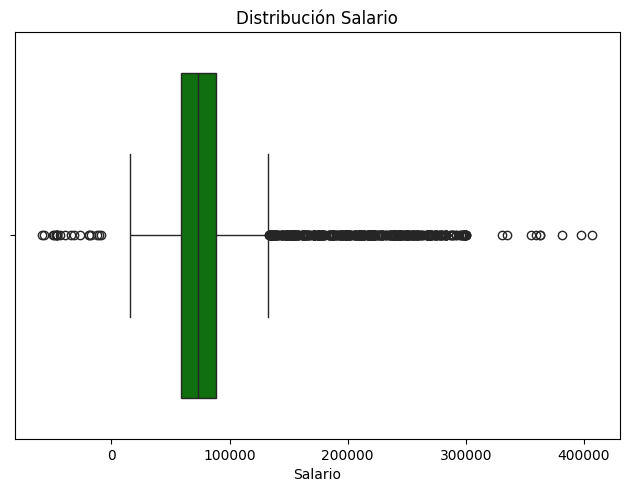

In [149]:
# Para comprobar que hay muchos datos atípicos puedo hacer un boxplot, donde se pueda ver más claramente

sns.boxplot(x = 'Salary', data = customer_info, color="green")
plt.tight_layout()

plt.title("Distribución Salario")
plt.xlabel("Salario")

In [150]:
print(f"""
Como podemos ver en el boxplot anterior, vemos que la mayoría de datos se concentran entre un poco mas de 
cero y un poco más de 100000 pero tenemos muchos outliers, que son todos los puntos que aparecen fuera de 
las dos barras verticales. """)

# Teniendo en cuenta lo anterior, imputamos los nulos de 'Salary' haciendo que los valores nulos tomen el valor de la mediana
median_salary = customer_final['Salary'].median()
customer_final['Salary'] = customer_final['Salary'].fillna(median_salary)
customer_info['Salary'] = customer_info ['Salary'].fillna(median_salary)

print(f"""
Comprobamos que, despues de la imputación, el número de nulos que queda en la columna 'Salary' es 0
SUMA NULOS TOTALES SALARY ==> {customer_final['Salary'].isnull().sum()}
""")


Como podemos ver en el boxplot anterior, vemos que la mayoría de datos se concentran entre un poco mas de 
cero y un poco más de 100000 pero tenemos muchos outliers, que son todos los puntos que aparecen fuera de 
las dos barras verticales. 

Comprobamos que, despues de la imputación, el número de nulos que queda en la columna 'Salary' es 0
SUMA NULOS TOTALES SALARY ==> 0



In [151]:
print("""
En el caso de Cancellation Year y Month los nulos dan información, pues indican que no se ha producido cancelacion 
por parte del cliente. En este caso creo que no hace falta imputarlos, ni eliminarlos. """)






En el caso de Cancellation Year y Month los nulos dan información, pues indican que no se ha producido cancelacion 
por parte del cliente. En este caso creo que no hace falta imputarlos, ni eliminarlos. 


In [152]:
customer_final[['Enrollment Year', 'Enrollment Month','Cancellation Year', 'Cancellation Month', 'Year', 'Month']].select_dtypes(include=int)

,Enrollment Year,Enrollment Month,Year,Month
0,2016,2,2017,1
1,2016,2,2017,2
2,2016,2,2017,3
3,2016,2,2017,4
4,2016,2,2018,10
...,...,...,...,...
405619,2015,12,2018,8
405620,2015,12,2018,9
405621,2015,12,2018,10
405622,2015,12,2018,11


In [153]:
# MODIFICACION TIPOS DE DATOS

print(f"""
Las columnas ==> \n'Enrollment Year', 'Enrollment Month','Cancellation Year', 'Cancellation Month', 'Year', 'Month'
no son homogéneas.
* Unas son de formato int ==> \n{customer_final[['Enrollment Year', 'Enrollment Month','Cancellation Year', 'Cancellation Month', 'Year', 'Month']].select_dtypes(include=int).columns}
* Otras son de formato float ==> \n{customer_final[['Enrollment Year', 'Enrollment Month','Cancellation Year', 'Cancellation Month', 'Year', 'Month']].select_dtypes(include=float).columns}
Lo suyo es que todas fueran de tipo datetype, pues son fechas""")



Las columnas ==> 
'Enrollment Year', 'Enrollment Month','Cancellation Year', 'Cancellation Month', 'Year', 'Month'
no son homogéneas.
* Unas son de formato int ==> 
Index(['Enrollment Year', 'Enrollment Month', 'Year', 'Month'], dtype='object')
* Otras son de formato float ==> 
Index(['Cancellation Year', 'Cancellation Month'], dtype='object')
Lo suyo es que todas fueran de tipo datetype, pues son fechas


In [154]:
# PREGUNTA 1: NO SE PUEDE CONVERTIR SOLO AÑO O SOLO MES A DATETYPE,NO?

## 2: VISUALIZACION

### 2.1: ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

In [155]:
customer_final.columns

Index(['Loyalty Number', 'Province', 'City', 'Postal Code', 'Gender',
       'Education', 'Salary', 'Marital Status', 'Loyalty Card', 'CLV',
       'Enrollment Type', 'Enrollment Year', 'Enrollment Month',
       'Cancellation Year', 'Cancellation Month', 'Year', 'Month',
       'Flights Booked', 'Flights with Companions', 'Total Flights',
       'Distance', 'Points Accumulated', 'Points Redeemed',
       'Dollar Cost Points Redeemed'],
      dtype='object')

In [156]:
# En este ejercicio se nos pide el total de vuelos reservados por mes y año. 
print(f"""
Primero voy a filtrar por año, para poder hacer un dataframe por cada año, agrupando
los vuelos por meses. Si no filtramos por año van a sumarse los vuelos de los meses coincidentes
de años distintos. Los años de los que tenemos datos son
{customer_final['Year'].unique()}""")

# para 2017
customer_final_2017 = customer_final[customer_final['Year'] == 2017].groupby('Month')['Flights Booked'].sum()

print("En 2017 el total de vuelos realizados por cada mes son ==>")
customer_final_2017 = customer_final_2017.reset_index()
customer_final_2017


Primero voy a filtrar por año, para poder hacer un dataframe por cada año, agrupando
los vuelos por meses. Si no filtramos por año van a sumarse los vuelos de los meses coincidentes
de años distintos. Los años de los que tenemos datos son
[2017 2018]
En 2017 el total de vuelos realizados por cada mes son ==>


,Month,Flights Booked
0,1,47766
1,2,47691
2,3,64271
3,4,55720
4,5,65279
5,6,80493
6,7,89288
7,8,78692
8,9,63304
9,10,60351


In [157]:
# Hacemos lo mismo para 2018

customer_final_2018 = customer_final[customer_final['Year'] == 2018].groupby('Month')['Flights Booked'].sum()
print("En 2018 el total de vuelos realizados por cada mes son ==>")
customer_final_2018 = customer_final_2018.reset_index()
customer_final_2018

En 2018 el total de vuelos realizados por cada mes son ==>


,Month,Flights Booked
0,1,49170
1,2,48643
2,3,66928
3,4,56791
4,5,76891
5,6,92749
6,7,104143
7,8,90512
8,9,73075
9,10,69110


C:\Users\Laura Romero\AppData\Local\Temp\ipykernel_13784\522609288.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']);
C:\Users\Laura Romero\AppData\Local\Temp\ipykernel_13784\522609288.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']);


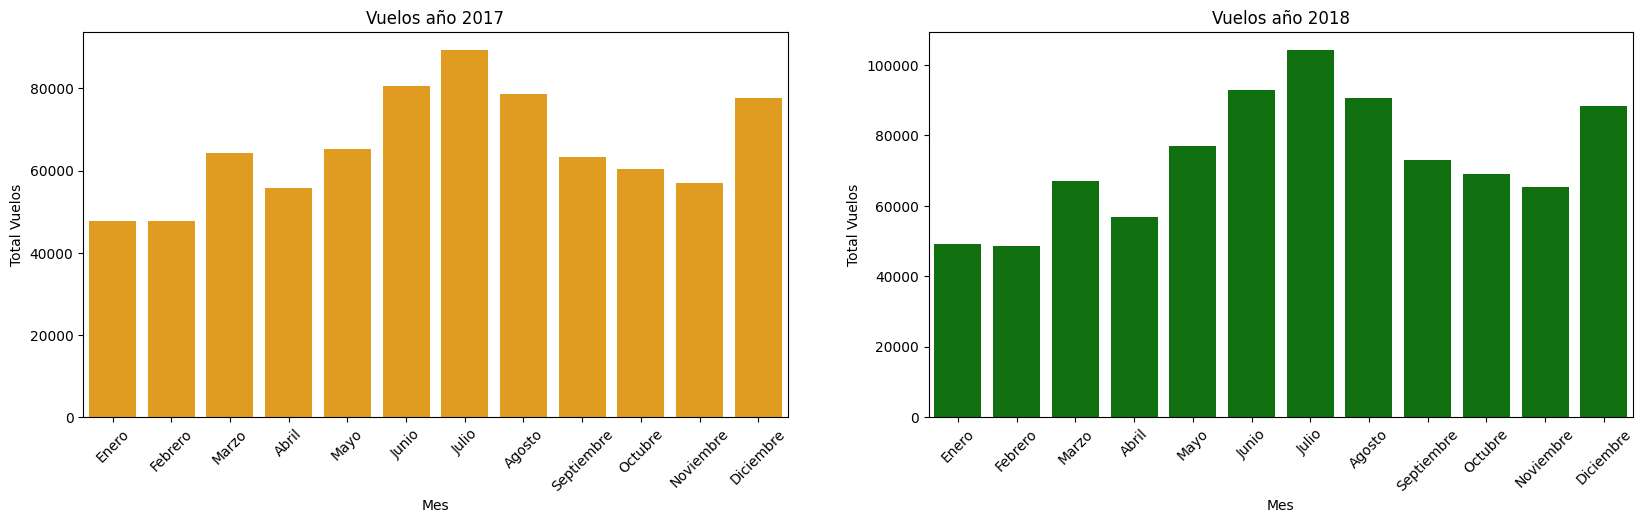

In [158]:
# Para ver la distribución del número de vuelos por mes y año podemos usar un diagrama de barras.
# Para poder comparar el año 2017 y el 2018 uso el metodo subplots, que me permite poner varias figuras
# juntas, lo cual resulta muy útil para poder comparar. 

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5));

# en la posicion 0,0 pondremos el diagrama de barras del año 2017
sns.barplot(data=customer_final_2017, x='Month', y="Flights Booked", ax=axes[0], color="orange");
axes[0].set_title('Vuelos año 2017');
axes[0].set_xlabel('Mes');
axes[0].set_ylabel('Total Vuelos');
axes[0].tick_params(axis='x', rotation=45);

# en la posicion 0,1 pondremos el diagrama de barras del año 2017
sns.barplot(data=customer_final_2018, x='Month', y="Flights Booked", ax=axes[1], color="green");
axes[1].set_title('Vuelos año 2018');
axes[1].set_xlabel('Mes');
axes[1].set_ylabel('Total Vuelos');
axes[1].tick_params(axis='x', rotation=45);

# Para que salga el nombre del mes en lugar de un numero del 1-12 cambio las etiquetas del eje x con set_xticklabels
axes[0].set_xticklabels(['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']);
axes[1].set_xticklabels(['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']);


In [159]:
print("""
La distribución del numero de vuelos agrupados por mes, para el año 2017 y el año 2018 
es muy similar, aunque se han reservado más vuelos en el año 2018 (en Julio de 2018 se reservaron 
más de 100000 vuelos).
--------------------------------------------------------------------------------------------------
En ambos años, los meses en los que más vuelos se han reservado son Junio, Julio y Agosto, lo cual 
tiene sentido porque coincide con el periodo vacacional de muchas personas.
--------------------------------------------------------------------------------------------------
Otro mes muy bueno tanto en 2017 como en 2018 fue Diciembre: lógico teniendo en cuenta que mucha 
gente viaja en Navidades.
--------------------------------------------------------------------------------------------------
Los meses en los que menos vuelos se han reservado, tanto en 2017 como en 2018 son Enero y Febrero
""")


La distribución del numero de vuelos agrupados por mes, para el año 2017 y el año 2018 
es muy similar, aunque se han reservado más vuelos en el año 2018 (en Julio de 2018 se reservaron 
más de 100000 vuelos).
--------------------------------------------------------------------------------------------------
En ambos años, los meses en los que más vuelos se han reservado son Junio, Julio y Agosto, lo cual 
tiene sentido porque coincide con el periodo vacacional de muchas personas.
--------------------------------------------------------------------------------------------------
Otro mes muy bueno tanto en 2017 como en 2018 fue Diciembre: lógico teniendo en cuenta que mucha 
gente viaja en Navidades.
--------------------------------------------------------------------------------------------------
Los meses en los que menos vuelos se han reservado, tanto en 2017 como en 2018 son Enero y Febrero



### 2.2: ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?

Text(0, 0.5, 'Puntos Acumulados')

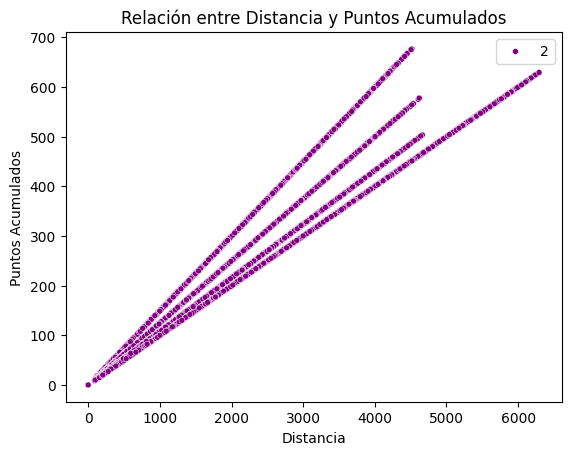

In [160]:
# Para ver correlacion entre dos variables podemos hacer un scatter plot

#customer_final[['Distance', 'Points Accumulated']]

sns.scatterplot( x='Distance', y='Points Accumulated', data=customer_final, size=2, color="purple")
plt.title("Relación entre Distancia y Puntos Acumulados")
plt.xlabel("Distancia")
plt.ylabel("Puntos Acumulados")



In [161]:
print(f"""
La relacion entre la distancia recorrida y los puntos acumulados por el cliente es 
una correlación positiva, cuanto más viaja el cliente más puntos acumulados tiene""")


La relacion entre la distancia recorrida y los puntos acumulados por el cliente es 
una correlación positiva, cuanto más viaja el cliente más puntos acumulados tiene


### 2.3: ¿Cuál es la distribución de los clientes por provincia o estado?

In [162]:
customer_final

,Loyalty Number,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,480934,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,1,0,0,0,0,0.0,0,0
1,480934,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,2,3,0,3,2823,282.0,0,0
2,480934,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,3,0,0,0,0,0.0,0,0
3,480934,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,4,0,0,0,0,0.0,0,0
4,480934,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2018,10,6,2,8,3352,335.0,465,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405619,652627,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2015,12,2016.0,8.0,2018,8,0,0,0,0,0.0,0,0
405620,652627,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2015,12,2016.0,8.0,2018,9,0,0,0,0,0.0,0,0
405621,652627,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2015,12,2016.0,8.0,2018,10,0,0,0,0,0.0,0,0
405622,652627,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2015,12,2016.0,8.0,2018,11,0,0,0,0,0.0,0,0


In [163]:
print(f"{customer_info.groupby('Province')['Loyalty Number'].count()}")
print(f"{customer_final.groupby('Province')['Loyalty Number'].count()}")


Province
Alberta                  969
British Columbia        4409
Manitoba                 658
New Brunswick            636
Newfoundland             258
Nova Scotia              518
Ontario                 5404
Prince Edward Island      66
Quebec                  3300
Saskatchewan             409
Yukon                    110
Name: Loyalty Number, dtype: int64
Province
Alberta                  23360
British Columbia        106442
Manitoba                 15900
New Brunswick            15352
Newfoundland              6244
Nova Scotia              12507
Ontario                 130258
Prince Edward Island      1584
Quebec                   79573
Saskatchewan              9861
Yukon                     2679
Name: Loyalty Number, dtype: int64


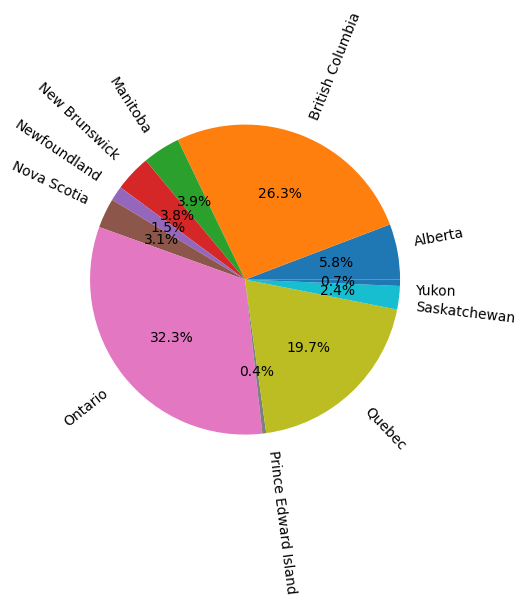

In [164]:
# Una forma de ver proporciones, es usando diagrama de pastel. Para ello necesito agrupar por provincia 
# a todos los clientes y hacer el recuento el numero de clientes que hay en cada una de ellas. 
# Para contar el número de clientes utilizo el Loyalty Number, y como toda esta información la tenía
# en customer_info lo hago con customer_info, porque en customer_flights si tengo Loyalty Number repetido en función del número de vuelos

plt.figure(figsize=(5,10))
customer_province = customer_info.groupby('Province')['Loyalty Number'].count().reset_index()
plt.pie("Loyalty Number", labels= "Province", data=customer_province, autopct="%1.1f%%", rotatelabels=45, );

In [165]:
print(f"""
Aproximadamente un tercio de los clientes residen en Ontario (un 32.3%), una cuarta parte aproximadamente
residen en British Columbia (26.4%) y aproximadamente una quinta parte residen en Quebec (19.7%) siendo 
las 3 provincias mayoritarias""")




Aproximadamente un tercio de los clientes residen en Ontario (un 32.3%), una cuarta parte aproximadamente
residen en British Columbia (26.4%) y aproximadamente una quinta parte residen en Quebec (19.7%) siendo 
las 3 provincias mayoritarias


### 2.4: ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

In [166]:
# Lo primero es hacer el dataframe que contenta los datos que queremos evaluar. En este caso se pide el salario promedio
# según el nivel educativo de los clientes. 
customer_final['Salary']
customer_final['Education']

customer_education = customer_info.groupby('Education')['Salary'].mean().reset_index()
customer_education

,Education,Salary
0,Bachelor,72451.061575
1,College,73479.000000
2,Doctor,178608.897820
3,High School or Below,61071.718670
4,Master,103757.848425


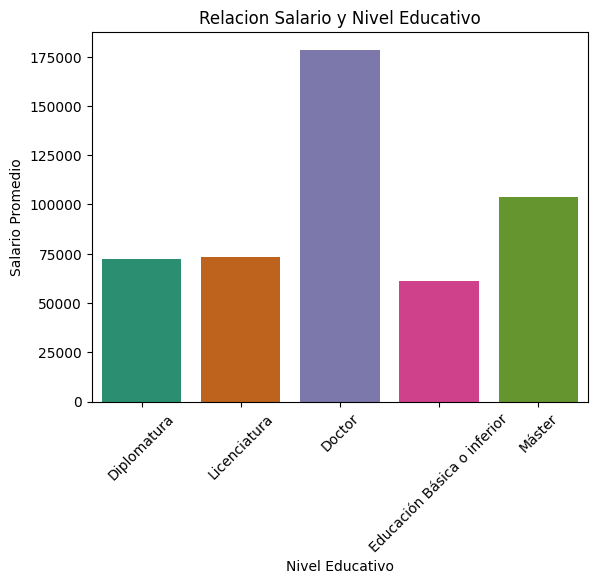

In [167]:
sns.barplot(data=customer_education, x='Education', y="Salary", hue = 'Education', palette='Dark2')
plt.title("Relacion Salario y Nivel Educativo")
plt.xlabel("Nivel Educativo")
plt.ylabel("Salario Promedio")
plt.tick_params(axis='x', rotation=45);

etiquetas_x = ['Diplomatura', 'Licenciatura', 'Doctor', 'Educación Básica o inferior', 'Máster']
plt.xticks(ticks=range(5), labels=etiquetas_x);

# la traduccion de los ejes x no es literal, pues los sistemas educativos entre Canadá y España son distintos, pero para 
# que se entienda mejor lo pongo en castellano. 


In [168]:
print("""
Los salarios más altos se concentran mayoritariamente en los clientes que son Doctores, que tienen un promedio de salario
que casi duplica a la segunda categoría con salarios más altos, que son clientes que han estudiado algún Master.
Los que tienen menor Salario son aquellos que no tienen educación superior. 
""")


Los salarios más altos se concentran mayoritariamente en los clientes que son Doctores, que tienen un promedio de salario
que casi duplica a la segunda categoría con salarios más altos, que son clientes que han estudiado algún Master.
Los que tienen menor Salario son aquellos que no tienen educación superior. 



### 2.5: ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

In [169]:
# Para contar el numero de clientes que tienen los diferentes tipos de tarjeta uso el dataframe customer_info, que tiene 
# esta información completa y cada Loyalty Number es un identificador único. 
customer_final.columns
customer_loyalty_card = customer_info.groupby('Loyalty Card')['Loyalty Number'].count().reset_index()
customer_loyalty_card

,Loyalty Card,Loyalty Number
0,Aurora,3429
1,Nova,5671
2,Star,7637


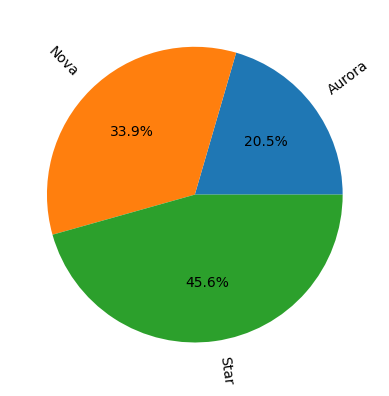

In [170]:
customer_loyalty_card = customer_info.groupby('Loyalty Card')['Loyalty Number'].count().reset_index()
plt.pie("Loyalty Number", labels= "Loyalty Card", data=customer_loyalty_card, autopct="%1.1f%%", rotatelabels=45);

In [171]:
print(f"""
Casi la mitad de los clientes tienen una tarjeta Star (45.6%), en torno a un tercio tienen tarjeta de tipo
Nova (33.9%) y una quinta parte aproximadamente (20.5 %) tienen tarjeta Aurora
Esto probablemente tenga relación con el Valor Estimado Cliente
------------------------------------------------------------------------------------------------------------------------
Valor medio estimado cliente tarjeta Star ==> {customer_info[customer_info['Loyalty Card'] == 'Star']['CLV'].mean()}
Valor medio estimado cliente tarjeta Nova ==> {customer_info[customer_info['Loyalty Card'] == 'Nova']['CLV'].mean()}
Valor medio estimado cliente tarjeta Aurora ==> {customer_info[customer_info['Loyalty Card'] == 'Aurora']['CLV'].mean()}
-------------------------------------------------------------------------------------------------------------------------
Por tanto vemos que la tarjeta Star es para clientes con menor valor estimado, la tarjeta Nova para clientes 
de más valor, y los mejores clientes, los que más valor aportan a la empresa tienen tarjeta Aurora. 
""")


Casi la mitad de los clientes tienen una tarjeta Star (45.6%), en torno a un tercio tienen tarjeta de tipo
Nova (33.9%) y una quinta parte aproximadamente (20.5 %) tienen tarjeta Aurora
Esto probablemente tenga relación con el Valor Estimado Cliente
------------------------------------------------------------------------------------------------------------------------
Valor medio estimado cliente tarjeta Star ==> 6741.7613722665965
Valor medio estimado cliente tarjeta Nova ==> 8045.615995415271
Valor medio estimado cliente tarjeta Aurora ==> 10672.686325459319
-------------------------------------------------------------------------------------------------------------------------
Por tanto vemos que la tarjeta Star es para clientes con menor valor estimado, la tarjeta Nova para clientes 
de más valor, y los mejores clientes, los que más valor aportan a la empresa tienen tarjeta Aurora. 



### 2.6: ¿Cómo se distribuyen los clientes según su estado civil y género?

In [172]:
# Primero, como siempre, hacemos el dataframe que vamos a usar para la visualizacion. 
# En este caso agrupamos los datos según el estado civil y hacemos recuento del numero de 
# hombres y mujeres según su estado civil. 

customer_marital = customer_info.groupby('Marital Status')['Gender'].value_counts().reset_index()
customer_marital

,Marital Status,Gender,count
0,Divorced,Female,1269
1,Divorced,Male,1249
2,Married,Female,4869
3,Married,Male,4866
4,Single,Female,2272
5,Single,Male,2212


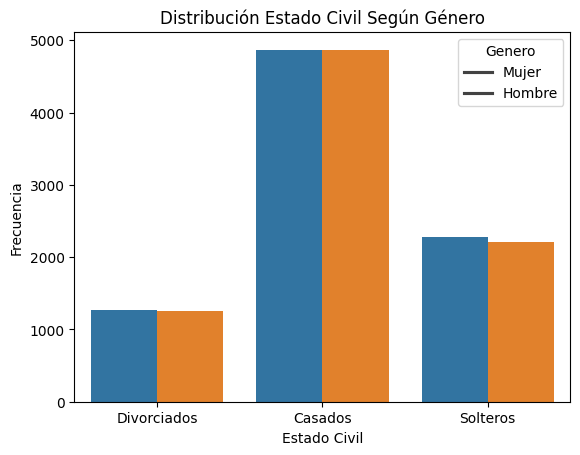

In [173]:
customer_marital = customer_info.groupby('Marital Status')['Gender'].value_counts().reset_index()

sns.barplot(data=customer_marital, x= 'Marital Status', y='count', hue='Gender')
plt.xticks(ticks=range(3), labels=('Divorciados', 'Casados', 'Solteros'));
plt.title('Distribución Estado Civil Según Género')
plt.xlabel('Estado Civil')
plt.ylabel('Frecuencia')
plt.legend(title= 'Genero', labels=('Mujer', 'Hombre'))



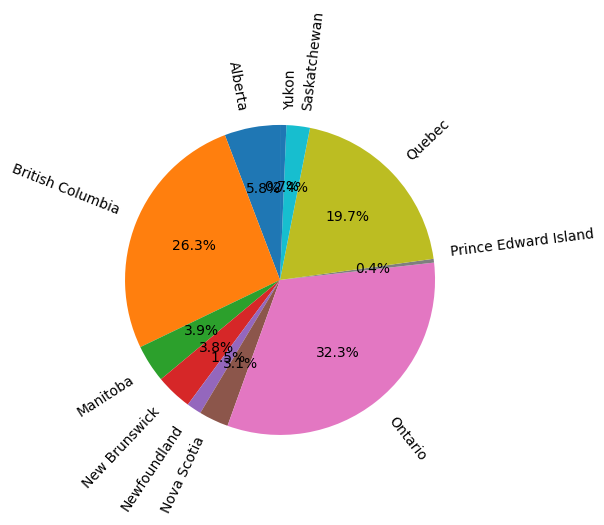

In [174]:
plt.figure(figsize=(5,10))
customer_province = customer_info.groupby('Province')['Loyalty Number'].count().reset_index()
plt.pie("Loyalty Number", labels= "Province", data=customer_province, autopct="%1.1f%%", startangle=90, rotatelabels=45, );

## FASE 3 (BONUS) : Evaluación de Diferencias en Reservas de Vuelos por Nivel Educativo

### 3.1: Preparación de los Datos

In [175]:
# Vamos a tener un grupo por cada nivel educativo, sobre el que calcularemos en numero de reservas de vuelos y haremos las comparativas

print(f"""Los diferentes niveles educativos que hay son {customer_final['Education'].unique()}""")

Los diferentes niveles educativos que hay son ['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']


In [176]:

lista_education = customer_final['Education'].unique() 

print(f"""
Saco una lista con todas las diferentes categorias de educacion que hay en el dataframe
lista_education ==> {lista_education}""") 

# Hago un bucle for para modificar la lista y cada elemento que sea un dataframe con la columnas que queremos seleccionar, 
# para ello itero sobre lista_education y modifico cada index de esta nueva lista (al que accedo con el contador) para que 
# en cada elemento tengamos un df con los datos buscados, y poder así hacer los grupos.

contador = 0
for i in lista_education:
    lista_education[contador] = customer_final[customer_final['Education'] == i][['Education', 'Flights Booked']]
    contador += 1

grupo_bachelor = lista_education[0]
grupo_college = lista_education[1]
grupo_master = lista_education[2]
grupo_highschool = lista_education[3]
grupo_doctor = lista_education [4]

print(f"Los grupos que tenemos son {len(lista_education)}, que son:\n")

print("BACHELOR ==>")
display(grupo_bachelor.head(3))

print("COLLEGE ==>")
display(grupo_college.head(3))

print("MASTER ==>")
display(grupo_master.head(3))

print("HIGH SCHOOL ==>")
display(grupo_highschool.head(3))

print("DOCTOR ==>")
display(grupo_doctor.head(3))


# Con este bucle for tengo una lista 



Saco una lista con todas las diferentes categorias de educacion que hay en el dataframe
lista_education ==> ['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
Los grupos que tenemos son 5, que son:

BACHELOR ==>


,Education,Flights Booked
0,Bachelor,0
1,Bachelor,3
2,Bachelor,0


COLLEGE ==>


,Education,Flights Booked
24,College,9
25,College,9
26,College,14


MASTER ==>


,Education,Flights Booked
384,Master,2
385,Master,12
386,Master,0


HIGH SCHOOL ==>


,Education,Flights Booked
816,High School or Below,9
817,High School or Below,13
818,High School or Below,2


DOCTOR ==>


,Education,Flights Booked
1344,Doctor,7
1345,Doctor,0
1346,Doctor,15


### 3.2: Analisis Descriptivo

In [177]:
print("""Vamos a calcular algunas medidas estadísticas descriptivas para cada grupo
""")


display(grupo_bachelor.groupby('Education')['Flights Booked'].agg(['mean', 'median', 'sum', 'std']))
print("-----------------------------------------------------------------------------------------")
display(grupo_college.groupby('Education')['Flights Booked'].agg(['mean', 'median', 'sum', 'std']))
print("-----------------------------------------------------------------------------------------")
display(grupo_master.groupby('Education')['Flights Booked'].agg(['mean', 'median', 'sum', 'std']))
print("-----------------------------------------------------------------------------------------")
display(grupo_highschool.groupby('Education')['Flights Booked'].agg(['mean', 'median', 'sum', 'std']))
print("-----------------------------------------------------------------------------------------")
display(grupo_doctor.groupby('Education')['Flights Booked'].agg(['mean', 'median', 'sum', 'std']))

Vamos a calcular algunas medidas estadísticas descriptivas para cada grupo



,mean,median,sum,std
Education,,,,
Bachelor,4.110288,1.0,1038123,5.221671


-----------------------------------------------------------------------------------------


,mean,median,sum,std
Education,,,,
College,4.169744,1.0,426398,5.24604


-----------------------------------------------------------------------------------------


,mean,median,sum,std
Education,,,,
Master,4.2007,1.0,51614,5.213956


-----------------------------------------------------------------------------------------


,mean,median,sum,std
Education,,,,
High School or Below,4.176209,1.0,78993,5.239267


-----------------------------------------------------------------------------------------


,mean,median,sum,std
Education,,,,
Doctor,4.175512,1.0,74036,5.256971


In [178]:
print(f"""
Aparentemente, echando un vistado a las medidas estadisticas descriptivas no hay una diferencia significativa ni en media de 
vuelos alquilados por grupos, la mediana es igual tambien para todos los grupos, y la desviacion tipica igualmente es similar. 
El grupo que claramente destaca atendiendo al numero de vuelos totales es bachelor, seguido de college, posiblemente porque sean los grupos
a los que mayoritariamente pertenecen nuestros clientes
{customer_info.groupby('Education')['Loyalty Number'].count()}
Efectivamente, comprobamos que predominan claramente los clientes con educacion Bachelor y College""")


Aparentemente, echando un vistado a las medidas estadisticas descriptivas no hay una diferencia significativa ni en media de 
vuelos alquilados por grupos, la mediana es igual tambien para todos los grupos, y la desviacion tipica igualmente es similar. 
El grupo que claramente destaca atendiendo al numero de vuelos totales es bachelor, seguido de college, posiblemente porque sean los grupos
a los que mayoritariamente pertenecen nuestros clientes
Education
Bachelor                10475
College                  4238
Doctor                    734
High School or Below      782
Master                    508
Name: Loyalty Number, dtype: int64
Efectivamente, comprobamos que predominan claramente los clientes con educacion Bachelor y College


### 3.3: Prueba Estadistica

In [179]:
print("""
Primero definimos las hipótesis:
- H0: No hay diferencia significativa entre grupos
- H1: Sí hay una diferencia significativa entre grupos
""")


Primero definimos las hipótesis:
- H0: No hay diferencia significativa entre grupos
- H1: Sí hay una diferencia significativa entre grupos



In [180]:
print("""
Lo siguiente que haremos es ver si sigue una distribución normal o no, para lo que usaremos el test de saphiro
""")


Lo siguiente que haremos es ver si sigue una distribución normal o no, para lo que usaremos el test de saphiro



In [181]:
# Uno los dataframe para tener un unico dataframe con la info solo de las columnas Education y Flights Booked
df_grupos_education = pd.concat([grupo_bachelor,grupo_college,grupo_doctor,grupo_highschool,grupo_master])
df_grupos_education.sample(5)

,Education,Flights Booked
249419,College,0
54506,College,0
177990,Bachelor,0
70093,Bachelor,3
107776,Bachelor,9


In [182]:
# Primero vamos a valorar si los datos siguen una distribución normal. 
# Lo haremos con el test estadístico shapiro
p_value = shapiro(df_grupos_education['Flights Booked']).pvalue

alpha = 0.05

if p_value > alpha:
    print("Los datos se ajustan a una distribución normal (p-value =", p_value, ")")
else:
    print("Los datos no se ajustan a una distribución normal (p-value =", p_value, ")")

Los datos no se ajustan a una distribución normal (p-value = 1.5469185712625606e-164 )


C:\Users\Laura Romero\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 403760.
  res = hypotest_fun_out(*samples, **kwds)


In [183]:
# El siguiente paso es analizar la homogeneidad de las varianzas
# Como estamos ante una distribución no normal usamos Levene. 

p_valor_varianza = stats.levene(grupo_bachelor['Flights Booked'],grupo_college['Flights Booked'],grupo_doctor['Flights Booked'],grupo_highschool['Flights Booked'],grupo_master['Flights Booked'], center = "median")[1]

if p_value > 0.05:
    print(f"No hay diferencia significativa entre las varianzas de los grupos")
else:
    print(f"Si hay diferencias significativas entre las varianzas de los grupos")

Si hay diferencias significativas entre las varianzas de los grupos


In [184]:
grupos = [grupo_bachelor, grupo_master, grupo_doctor, grupo_highschool, grupo_college]
medianas_diferentes = []
medianas_iguales = []

for control in grupos:
    vuelos_control = control['Flights Booked']
    for test in grupos:
        if test['Education'].iloc[0] != control['Education'].iloc[0]:
            
            # aplicamos el estadístico
            u_statistic, p_value = stats.mannwhitneyu(control['Flights Booked'], test['Flights Booked'])
            if p_value < 0.05:
                print(f"Para la métrica Flights Booked, las medianas son diferentes entre {control['Education'].iloc[0]} y {test['Education'].iloc[0]}")
                medianas_diferentes.append(f"{control['Education'].iloc[0]} y {test['Education'].iloc[0]}")
            else:
                print(f"Para la métrica Flights Booked, las medianas son iguales entre {control['Education'].iloc[0]} y {test['Education'].iloc[0]}")
                medianas_iguales.append(f"{control['Education'].iloc[0]} y {test['Education'].iloc[0]}")

Para la métrica Flights Booked, las medianas son diferentes entre Bachelor y Master
Para la métrica Flights Booked, las medianas son iguales entre Bachelor y Doctor
Para la métrica Flights Booked, las medianas son diferentes entre Bachelor y High School or Below
Para la métrica Flights Booked, las medianas son diferentes entre Bachelor y College
Para la métrica Flights Booked, las medianas son diferentes entre Master y Bachelor
Para la métrica Flights Booked, las medianas son iguales entre Master y Doctor
Para la métrica Flights Booked, las medianas son iguales entre Master y High School or Below
Para la métrica Flights Booked, las medianas son iguales entre Master y College
Para la métrica Flights Booked, las medianas son iguales entre Doctor y Bachelor
Para la métrica Flights Booked, las medianas son iguales entre Doctor y Master
Para la métrica Flights Booked, las medianas son iguales entre Doctor y High School or Below
Para la métrica Flights Booked, las medianas son iguales entre 

In [196]:
medianas_diferentes_limpio = []
for elemento in medianas_diferentes:
    elemento = elemento.split(" y ")
    elemento.sort(reverse=True)
    print(elemento)

['Master', 'Bachelor']
['High School or Below', 'Bachelor']
['College', 'Bachelor']
['Master', 'Bachelor']
['High School or Below', 'Bachelor']
['College', 'Bachelor']


In [201]:
medianas_diferentes = [elemento.split(' y ') for elemento in medianas_diferentes]

medianas_diferentes.sort()

AttributeError: 'list' object has no attribute 'split'

In [203]:
medianas_diferentes.sort()
medianas_diferentes

[['Bachelor', 'College'],
 ['Bachelor', 'High School or Below'],
 ['Bachelor', 'Master'],
 ['College', 'Bachelor'],
 ['High School or Below', 'Bachelor'],
 ['Master', 'Bachelor']]

In [199]:
for elemento in medianas_diferentes:
    elemento = elemento.split
        

AttributeError: 'list' object has no attribute 'split'

In [186]:
print(f"""
El resultado de comparar grupos dos a dos ha dado que las medianas son diferentes para ==> 
{medianas_diferentes}
Numero de grupos discrepantes entre sí ==> {len(medianas_diferentes)}
----------------------------------------------------------------------------------------------------------------------------------------
y con iguales para
{medianas_iguales}
Numero de grupos similares entre sí ==> {len(medianas_iguales)}
-----------------------------------------------------------------------------------------------------------------------------------------
Las medianas son iguales para todos los grupos excepto en el caso de Bachelor, que solo tiene similitudes con Doctor, pero tiene diferencias
significativas con el resto. 
Podríamos decir que el grupo menos similar al resto es Bachelor""")


El resultado de comparar grupos dos a dos ha dado que las medianas son diferentes para ==> 
['Bachelor y Master', 'Bachelor y High School or Below', 'Bachelor y College', 'Master y Bachelor', 'High School or Below y Bachelor', 'College y Bachelor']
Numero de grupos discrepantes entre sí ==> 6
----------------------------------------------------------------------------------------------------------------------------------------
y con iguales para
['Bachelor y Doctor', 'Master y Doctor', 'Master y High School or Below', 'Master y College', 'Doctor y Bachelor', 'Doctor y Master', 'Doctor y High School or Below', 'Doctor y College', 'High School or Below y Master', 'High School or Below y Doctor', 'High School or Below y College', 'College y Master', 'College y Doctor', 'College y High School or Below']
Numero de grupos similares entre sí ==> 14
-----------------------------------------------------------------------------------------------------------------------------------------
Las med

In [187]:
diccionario_grupos = [
    {"grupo": grupo_bachelor}, 
    {"grupo": grupo_master}, 
    {"grupo": grupo_doctor},
    {"grupo": grupo_highschool},
    {"grupo": grupo_college}]

In [188]:
for value in diccionario_grupos.values():
    for i 


SyntaxError: invalid syntax (3061605239.py, line 2)

In [ ]:
# filtramos el DataFrame para quedarnos solo con los datos de control
control = dataframe[dataframe[columna_grupos] == grupo_control]

# filtramos el DataFrame para quedarnos solo con los datos de control
test = dataframe[dataframe[columna_grupos] == grupo_test]
    

NameError: name 'dataframe' is not defined

In [ ]:
# Para hacer la comparativa entre los dos grupos usamos la prueba t de student, especificando que las varianzas son distintas. equal_var=False
t_stat, p_valor = stats.ttest_ind(grupo_bachelor['Flights Booked'],grupo_college['Flights Booked'], equal_var=False)

alfa = 0.05

# comparamos el p-valor con el nivel de significancia
if p_valor < alfa:
    print("Rechazamos la hipótesis nula.")
    print("Hay una diferencia significativa en los ingresos promedio entre los dos grupos.")
else:
    print("No podemos rechazar la hipótesis nula.")
    print("No hay evidencia suficiente para afirmar una diferencia significativa en los ingresos promedio entre los dos grupos.")

Rechazamos la hipótesis nula.
Hay una diferencia significativa en los ingresos promedio entre los dos grupos.


In [ ]:
# Para hacer la comparativa entre los dos grupos usamos la prueba t de student, especificando que las varianzas son distintas. equal_var=False
t_stat, p_valor_bm = stats.ttest_ind(grupo_bachelor['Flights Booked'],grupo_master['Flights Booked'], equal_var=False)

alfa = 0.05

# comparamos el p-valor con el nivel de significancia
if p_valor_bm < alfa:
    print("Rechazamos la hipótesis nula.")
    print("Hay una diferencia significativa en los ingresos promedio entre los dos grupos.")
else:
    print("No podemos rechazar la hipótesis nula.")
    print("No hay evidencia suficiente para afirmar una diferencia significativa en los ingresos promedio entre los dos grupos.")

No podemos rechazar la hipótesis nula.
No hay evidencia suficiente para afirmar una diferencia significativa en los ingresos promedio entre los dos grupos.


In [ ]:
# Para hacer la comparativa entre los dos grupos usamos la prueba t de student, especificando que las varianzas son distintas. equal_var=False
t_stat, p_valor = stats.ttest_ind(grupo_bachelor['Flights Booked'],grupo_doctor['Flights Booked'], equal_var=False)

alfa = 0.05

# comparamos el p-valor con el nivel de significancia
if p_valor < alfa:
    print("Rechazamos la hipótesis nula.")
    print("Hay una diferencia significativa en los ingresos promedio entre los dos grupos.")
else:
    print("No podemos rechazar la hipótesis nula.")
    print("No hay evidencia suficiente para afirmar una diferencia significativa en los ingresos promedio entre los dos grupos.")

No podemos rechazar la hipótesis nula.
No hay evidencia suficiente para afirmar una diferencia significativa en los ingresos promedio entre los dos grupos.


In [ ]:
# Como tene

u_statistic, p_value = stats.mannwhitneyu(grupo_bachelor['Flights Booked'],grupo_doctor['Flights Booked'])

if p_value < 0.05:
    print(f"Las medianas son diferentes, y por tanto se cumple la hipotesis alternativa ==> sí hay diferencias significativas entre grupos ")
else:
    print(f"Las medianas son similares, y por tanto sí se cumple la hipótesis nula ==> No hay diferencias significativas entre grupos")

Las medianas son similares, y por tanto sí se cumple la hipótesis nula ==> No hay diferencias significativas entre grupos


In [ ]:
# El siguiente paso es analizar la homogeneidad de las varianzas
# Como estamos ante una distribución no normal usamos Levene. 

p_valor_varianza = stats.levene(grupo_bachelor['Flights Booked'],grupo_college['Flights Booked'],grupo_doctor['Flights Booked'],grupo_highschool['Flights Booked'],grupo_master['Flights Booked'], center = "median")[1]

if p_valor_varianza > 0.05:
    # realizamos la prueba t de Student
    t_stat, p_valor = stats.ttest_ind(grupo_bachelor['Flights Booked'],grupo_college['Flights Booked'],grupo_doctor['Flights Booked'],grupo_highschool['Flights Booked'],grupo_master['Flights Booked'], equal_var=True)
else:
    t_stat, p_valor = stats.ttest_ind(grupo_bachelor['Flights Booked'],grupo_college['Flights Booked'],grupo_doctor['Flights Booked'],grupo_highschool['Flights Booked'],grupo_master['Flights Booked'], equal_var=False)